# TensorFlow Traffic Sign Recognition (Belgian Traffic Sign data set)

In [18]:
import wget
wget.download("https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip")
wget.download("https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip")

'BelgiumTSC_Testing.zip'

In [19]:
import zipfile
# !unzip BelgiumTSC_Training.zip
# !unzip BelgiumTSC_Testing.zip
# Specify the path to the zip file
train_path = "./BelgiumTSC_Training.zip"
test_path = "./BelgiumTSC_Testing.zip"

# Open the zip file
with zipfile.ZipFile(train_path, 'r') as zip_ref:
    # Extract all the contents of the zip file to the specified extract path
    zip_ref.extractall()
# Open the zip file
with zipfile.ZipFile(test_path, 'r') as zip_ref:
    # Extract all the contents of the zip file to the specified extract path
    zip_ref.extractall()

In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import os
import numpy as np
import random

from skimage import transform
from skimage import data
from skimage.color import rgb2gray
from imageio.v2 import imread

# Create a dictionary with Class Names
classnames = {
              0 : 'Warning for a bad road surface',
              1 : 'Warning for a speed bump',
              2 : 'Warning for a slippery road surface',
              3 : 'Warning for a curve to the left',
              4 : 'Warning for a curve to the right',
              5 : 'Warning for a double curve, first left then right',                                                    # Merge Classes 5 & 6 later
              6 : 'Warning for a double curve, first left then right',
              7 : 'Watch out for children ahead',
              8 : 'Watch out for  cyclists',
              9 : 'Watch out for cattle on the road',
              10: 'Watch out for roadwork ahead',
              11: 'Traffic light ahead',
              12: 'Watch out for railroad crossing with barriers ahead',
              13: 'Watch out ahead for unknown danger',
              14: 'Warning for a road narrowing',
              15: 'Warning for a road narrowing on the left',
              16: 'Warning for a road narrowing on the right',
              17: 'Warning for side road on the right',
              18: 'Warning for an uncontrolled crossroad',
              19: 'Give way to all drivers',
              20: 'Road narrowing, give way to oncoming drivers',
              21: 'Stop and give way to all drivers',
              22: 'Entry prohibited (road with one-way traffic)',
              23: 'Cyclists prohibited',
              24: 'Vehicles heavier than indicated prohibited',
              25: 'Trucks prohibited',
              26: 'Vehicles wider than indicated prohibited',
              27: 'Vehicles higher than indicated prohibited',
              28: 'Entry prohibited',
              29: 'Turning left prohibited',
              30: 'Turning right prohibited',
              31: 'Overtaking prohibited',
              32: 'Driving faster than indicated prohibited (speed limit)',
              33: 'Mandatory shared path for pedestrians and cyclists',
              34: 'Driving straight ahead mandatory',
              35: 'Mandatory left',
              36: 'Driving straight ahead or turning right mandatory',
              37: 'Mandatory direction of the roundabout',
              38: 'Mandatory path for cyclists',
              39: 'Mandatory divided path for pedestrians and cyclists',
              40: 'Parking prohibited',
              41: 'Parking and stopping prohibited',
              42: '',
              43: '',
              44: 'Road narrowing, oncoming drivers have to give way',
              45: 'Parking is allowed',
              46: 'parking for handicapped',
              47: 'Parking for motor cars',
              48: 'Parking for goods vehicles',
              49: 'Parking for buses',
              50: 'Parking only allowed on the sidewalk',
              51: 'Begin of a residential area',
              52: 'End of the residential area',
              53: 'Road with one-way traffic',
              54: 'Dead end street',
              55: '',
              56: 'Crossing for pedestrians',
              57: 'Crossing for cyclists',
              58: 'Parking exit',
              59: 'Information Sign : Speed bump',
              60: 'End of the priority road',
              61: 'Begin of a priority road'
    }


<a id='exploration'></a>
## Loading And Exploring The Data

In [24]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir)
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f)
                      for f in os.listdir(label_dir)
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = ""
train_data_dir = os.path.join(ROOT_PATH, "Training")
test_data_dir = os.path.join(ROOT_PATH, "Testing")

train_images, train_labels = load_data(train_data_dir)
test_images, test_labels = load_data(test_data_dir)

In [25]:
train_labels_array = np.array(train_labels)
test_labels_array = np.array(test_labels)

In [26]:
train_images[len(train_images)-1]

array([[[ 73,  62,  55],
        [ 65,  57,  50],
        [ 69,  60,  53],
        ...,
        [ 66,  70,  41],
        [ 65,  67,  42],
        [ 63,  63,  41]],

       [[ 80,  71,  64],
        [ 70,  62,  55],
        [ 69,  61,  54],
        ...,
        [ 67,  68,  40],
        [ 70,  70,  45],
        [ 72,  71,  48]],

       [[ 86,  81,  73],
        [ 75,  70,  62],
        [ 69,  64,  56],
        ...,
        [ 66,  67,  40],
        [ 72,  72,  46],
        [ 78,  78,  53]],

       ...,

       [[ 69,  66,  59],
        [ 72,  69,  62],
        [ 68,  65,  59],
        ...,
        [ 85,  91,  65],
        [ 70,  75,  56],
        [ 56,  58,  44]],

       [[ 68,  64,  57],
        [ 72,  67,  61],
        [ 68,  63,  57],
        ...,
        [ 95, 104,  75],
        [ 80,  93,  69],
        [ 64,  78,  58]],

       [[ 66,  60,  53],
        [ 69,  64,  56],
        [ 68,  62,  55],
        ...,
        [ 89,  95,  66],
        [ 90, 106,  79],
        [ 88, 107,  84]]

In [27]:
train_labels_array = np.array(train_labels)
test_labels_array = np.array(test_labels)

train_images_array = train_images
test_images_array = test_images
# Print the `images` dimensions
#print(train_images_array.ndim)

# Print the number of `images`'s elements
print(len(train_images_array))

# Print the first instance of `images`
train_images_array[0]

# Print the `labels` dimensions
print(train_labels_array.ndim)

# Print the number of `labels`'s elements
print(train_labels_array.size)

# Count the number of labels
print(len(set(train_labels_array)))

4575
1
4575
62


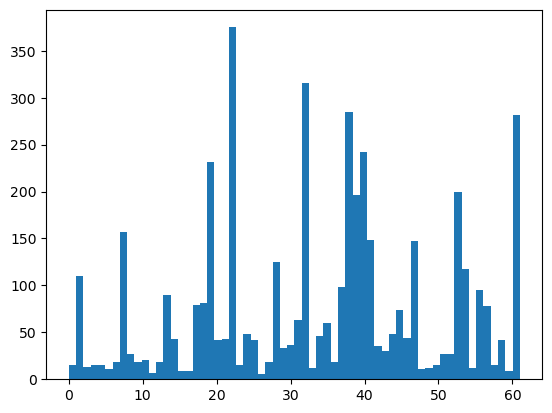

In [29]:
# Import the `pyplot` module
import matplotlib.pyplot as plt

# Make a histogram with 62 bins of the `labels` data
plt.hist(train_labels, 62)

# Show the plot
plt.show()

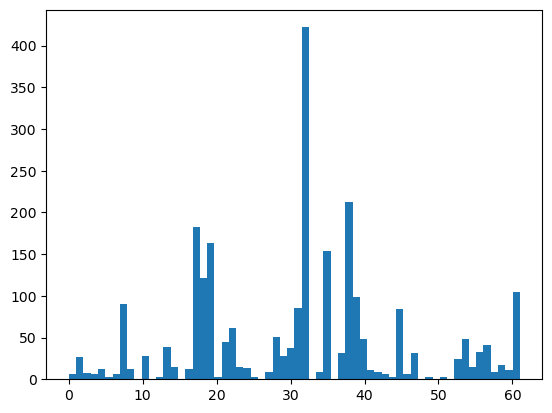

In [30]:
# Import the `pyplot` module
import matplotlib.pyplot as plt

# Make a histogram with 62 bins of the `labels` data
plt.hist(test_labels, 62)

# Show the plot
plt.show()

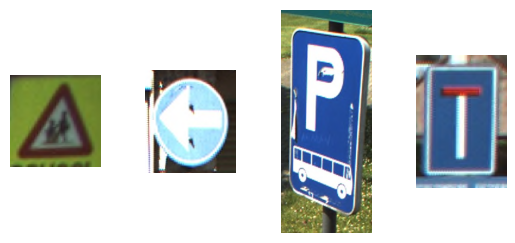

In [31]:
# Import the `pyplot` module of `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(train_images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

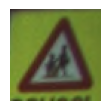

shape: (62, 61, 3), min: 3, max: 160


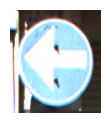

shape: (110, 96, 3), min: 3, max: 255


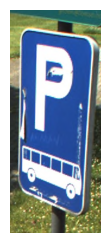

shape: (379, 153, 3), min: 0, max: 255


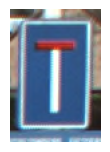

shape: (100, 68, 3), min: 17, max: 255


In [32]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(train_images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(train_images[traffic_signs[i]].shape,
                                                  train_images[traffic_signs[i]].min(),
                                                  train_images[traffic_signs[i]].max()))

<a id='extraction'></a>
## Feature Extraction
### Rescaling Images

In [33]:
# Resize images
import skimage                              # for scikit-learn image operations
def transform_images(images,height,width):
  transformed_images = [skimage.transform.resize(image,(height,width)) for image in images]
  return transformed_images
train_images128 = transform_images(train_images,128,128)
train_images128 = np.array(train_images128)
test_images128 = transform_images(test_images,128,128)
test_images128 = np.array(test_images128)

### Image Conversion to Grayscale

In [ ]:
def convert_to_grayscale(images_array):
  return skimage.color.rgb2gray(images_array)

train_images128_gray = convert_to_grayscale(train_images128)
print(train_images128_gray[0].shape)


(128, 128)


In [ ]:
#images32 = rgb2gray(np.array(images32))

Min Height: 22
Min Width: 20
maximum amount of images with Height 97 := 63


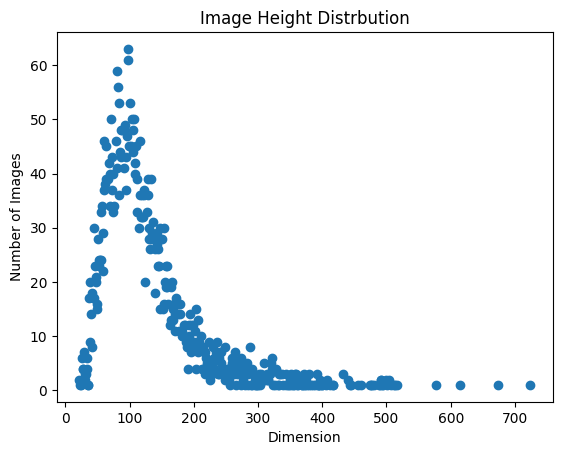

maximum amount of images with Width 84 := 58


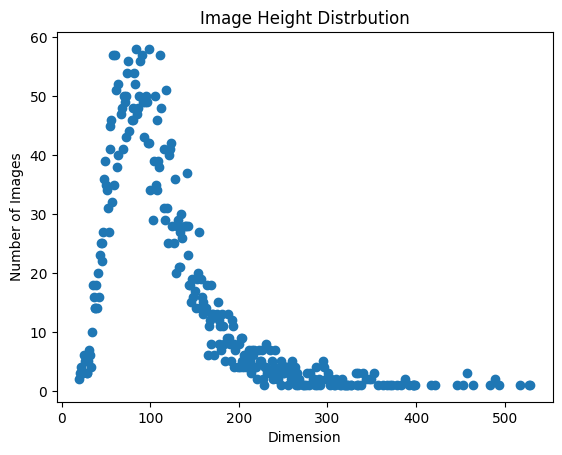

In [ ]:
def image_dims(images):
  heights = []
  widths =  []
  min_height = images[0].shape[0]
  min_width =  images[0].shape[1]
  for img in images:
    heights.append(img.shape[0])
    widths.append(img.shape[1])
    if min_height > img.shape[0]:
      min_height = img.shape[0]
    if min_width  > img.shape[1]:
      min_width= img.shape[1]
  print('Min Height:',str(min_height))
  print('Min Width:',str(min_width))
  return heights,widths

def plot_dimensions(dimension, count,text = 'Dimension'):
  print('maximum amount of images with '+ text +' {0} := {1}'.format(list(dimension)[list(count).index(max(count))],max(count)))
  plt.scatter(list(dimension),count)
  plt.title("Image Height Distrbution")
  plt.xlabel('Dimension')
  plt.ylabel('Number of Images')
  plt.show()

heights,widths = image_dims(train_images)
unique_heights = set(heights)
unique_widths = set(widths)

heights_count = [heights.count(num) for num in unique_heights]
widths_count = [widths.count(num) for num in unique_widths]

plot_dimensions(unique_heights,heights_count,'Height')
plot_dimensions(unique_widths,widths_count,'Width')

In [ ]:
# Training Data Generator

training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.25,fill_mode='nearest')
train_generator = training_datagen.flow(train_images128,train_labels,batch_size=32)

In [ ]:
def conv_net(train_images_dims,num_of_classes,filter_size = 2,num_convolutions=64,num_strides=2):
  # pre process image dimensions
  if (len(train_images_dims) == 3):    # Channel Last
    train_images_dims = (train_images_dims[1],train_images_dims[2])
  elif (len(train_images_dims) == 4):
    train_images_dims = (train_images_dims[1],train_images_dims[2],train_images_dims[3])

  model  = tf.keras.Sequential()

  #Conv1
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu',input_shape= train_images_dims))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

  #Conv2
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

  #Conv3
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

  #Conv4
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

  #Conv5
  model.add(tf.keras.layers.Conv2D(int(num_convolutions) ,(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

  #Flatten and add Dense Layer
  model.add(tf.keras.layers.Flatten())
  #Dense 1
  model.add(tf.keras.layers.Dense(512,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  #Dense 2
  model.add(tf.keras.layers.Dense(512,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))

  #Output Layer
  model.add(tf.keras.layers.Dense(num_of_classes,activation = 'softmax'))
  return model

monitor = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 8,restore_best_weights = True, min_delta = 0.01)

model_regularized = conv_net(train_images128.shape,len(set(train_labels)),filter_size=2,num_convolutions=512)

model_regularized.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
model_regularized.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 512)     6656      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 512)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 512)       1049088   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 512)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 512)       1049088   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 512)       0

### Running The Neural Network

In [ ]:
history = model_regularized.fit(train_generator, validation_data=train_generator,steps_per_epoch=(len(train_images) / 32),epochs = 2,verbose=1,callbacks=[monitor])  # 32 = batch size

Epoch 1/2
142/142 [==============================] - 83s 485ms/step - loss: 3.6678 - accuracy: 0.0835 - val_loss: 3.3940 - val_accuracy: 0.1250
Epoch 2/2
142/142 [==============================] - 64s 451ms/step - loss: 3.1762 - accuracy: 0.1937 - val_loss: 2.7003 - val_accuracy: 0.2658


### Evaluating The Neural Network

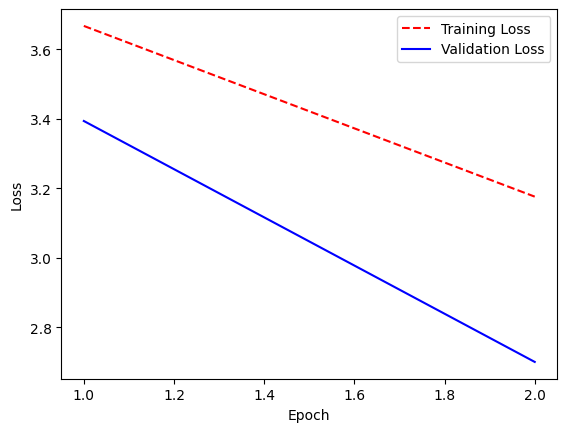

In [ ]:
# Get training and test loss histories
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


In [ ]:
# SAVE THE MODEL AS H5 File (e.g. to use in an app)
model_regularized.save('final_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
